# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [27]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

# Leitura do conjunto de dados Boston Housing diretamente do URL
boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

# Criação de uma cópia do conjunto de dados excluindo a coluna 'medv'
X = boston.drop(columns=['medv']).copy()

# Criação de um DataFrame contendo apenas a coluna 'medv'
y = boston[['medv']]

In [11]:
# Exibindo as cinco primeiras linhas do 'df' variáveis independentes
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [12]:
# Exibindo as cinco primeiras linhas do 'df' variáveis dependentes
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [13]:
# O método .info() fornece informações essenciais sobre o DataFrame boston.
# Isso inclui o número total de entradas, os tipos de dados de cada coluna
# e a quantidade de memória usada pelo DataFrame.

boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

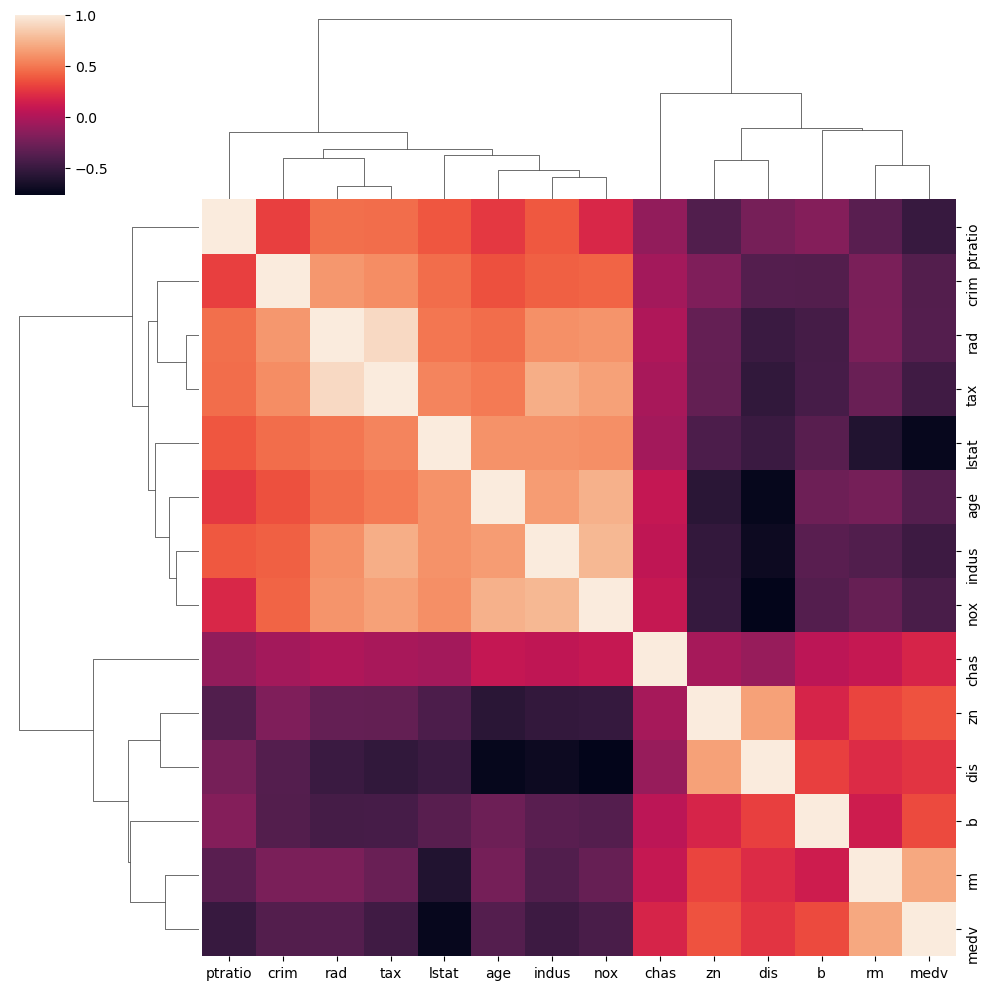

In [15]:
# O sns.clustermap() cria um mapa de cluster para visualizar a matriz de correlação entre as variáveis do DataFrame boston.
# O mapa de cluster organiza as variáveis semelhantes em grupos, facilitando a identificação de padrões nas relações.
sns.clustermap(boston.corr())

### 3. Separe os dados em validação e teste

In [80]:
# Dividindo o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [81]:
# Criando o primeiro modelo de árvore de decisão com profundidade máxima 1
modelo1 = DecisionTreeRegressor(max_depth=4)
modelo1.fit(X_train, y_train)

# Criando o segundo modelo de árvore de decisão com profundidade máxima 2
modelo2 = DecisionTreeRegressor(max_depth=2)
modelo2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [82]:
# Fazendo previsões usando o primeiro modelo nos conjuntos de treinamento e teste
y_pred1_train = modelo1.predict(X_train)
y_pred1_test = modelo1.predict(X_test)

# Fazendo previsões usando o segundo modelo nos conjuntos de treinamento e teste
y_pred2_train = modelo2.predict(X_train)
y_pred2_test = modelo2.predict(X_test)

In [83]:
# Calculando e imprimindo o erro quadrático médio (MSE) para os modelos nos conjuntos de treinamento e teste
mse1_train = mean_squared_error(y_train, y_pred1_train)
mse1_test = mean_squared_error(y_test, y_pred1_test)
mse2_train = mean_squared_error(y_train, y_pred2_train)
mse2_test = mean_squared_error(y_test, y_pred2_test)

print(f"MSE para o modelo 1 na base de treinamento: {mse1_train}") 
print(f"MSE para o modelo 1 na base de teste: {mse1_test}") 
print(f"MSE para o modelo 2 na base de treinamento: {mse2_train}") 
print(f"MSE para o modelo 2 na base de teste: {mse2_test}") 

MSE para o modelo 1 na base de treinamento: 10.026206963438655
MSE para o modelo 1 na base de teste: 10.425482717579396
MSE para o modelo 2 na base de treinamento: 26.1011039760985
MSE para o modelo 2 na base de teste: 23.085735263067402


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [ ]:
O modelo um, neste caso parece mais adequada. 

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

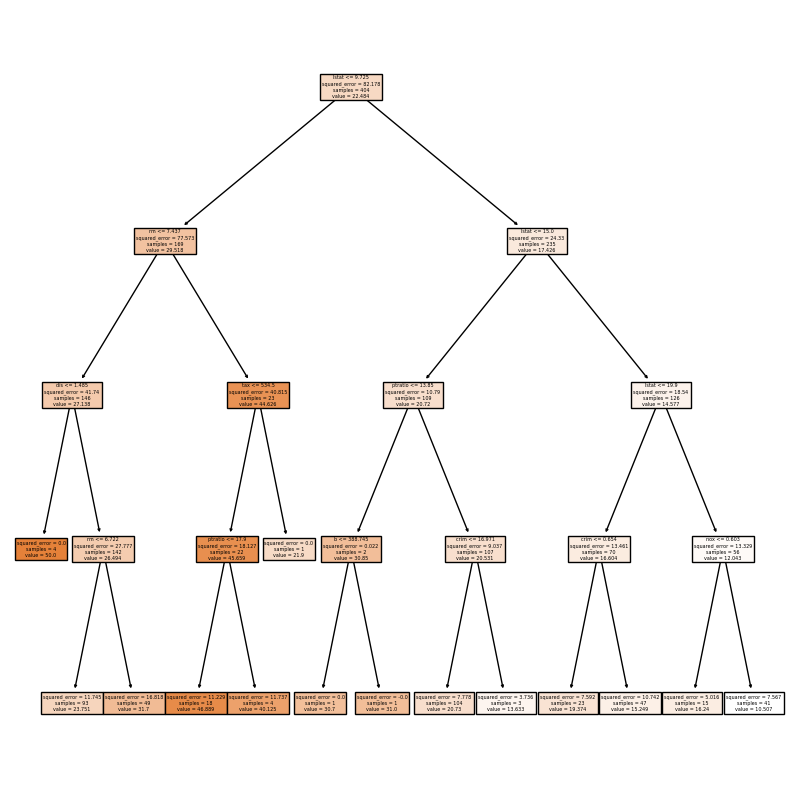

In [84]:
tp = tree.plot_tree(modelo1, feature_names=X.columns.tolist(), filled=True)